In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Malik, Lukas (1518526)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

Layer 1 contains as many Neurons as Values in the image. Four layers are used with decreasing number of neurons. Fewer neurons in subsequent layers lead to a condensed representation in deeper layers. The number of output neurons is equal to the number of classes. Relu was chosen as it is less expensive. The models performance is little worse than the performance on the validation set.  (length: 390)



Max val score: 74.51%


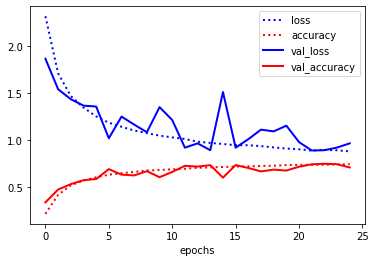

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dense_9 (Dense)              (None, 768)               2360064   
_________________________________________________________________
dense_10 (Dense)             (None, 384)               295296    
_________________________________________________________________
dense_11 (Dense)             (None, 192)               73920     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1930      
Total params: 12,171,466
Trainable params: 12,171,466
Non-trainable params: 0
__________________________________________

def build_model_1_1():
    n_layer1 = 3072
    n_layer2 = n_layer1/4
    n_layer3 = n_layer1/8
    n_layer4 = n_layer1/16

    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(n_layer1, activation='relu'))
    model.add(layers.Dense(n_layer2, activation='relu'))
    model.add(layers.Dense(n_layer3, activation='relu'))
    model.add(layers.Dense(n_layer4, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="rmsprop",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



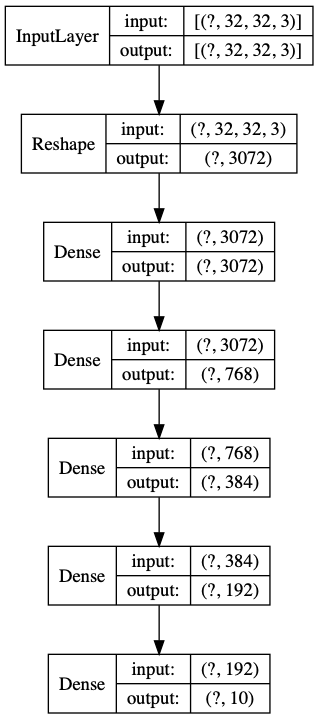

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

Layer 1 contains as many Neurons as Values in the image. This time 32 * 32 * 1, because the three rgb channels are condensed to one channel. Fewer neurons in subsequent layers lead to a condensed representation in deeper layers. Otherwise the architecture is the same. The performance improved greatly with this representation, as the color offers no additional information for the task.  (length: 389)



Max val score: 77.99%


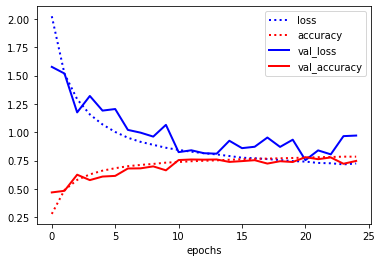

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_33 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 10)                650       
Total params: 1,353,802
Trainable params: 1,353,802
Non-trainable params: 0
____________________________________________

def build_model_1_2():
    n_layer1 = 32*32 
    n_layer2 = n_layer1/4
    n_layer3 = n_layer1/8
    n_layer4 = n_layer1/16

    model = models.Sequential()
    model.add(layers.Reshape((n_layer1,), input_shape=(32,32,1)))
    model.add(layers.Dense(n_layer1, activation='relu'))
    model.add(layers.Dense(n_layer2, activation='relu'))
    model.add(layers.Dense(n_layer3, activation='relu'))
    model.add(layers.Dense(n_layer4, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer="rmsprop",
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

The architecture is similar to the one used in 1.2. The low 20% dropout rate shouldd avoid overfitting and still allow the network to extract enough features from the data. SGD and nesterov acceleration are used which uses a "look ahead" gradient, in order to adapt the learning rate. A total of 50 epochs is used as there are no signs of overfitting.  (length: 353)



Max val score: 84.24%


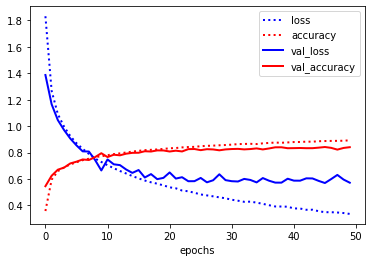

def build_model_1_3():
    n_layer1 = 32*32 
    n_layer2 = n_layer1/4
    n_layer3 = n_layer1/8
    n_layer4 = n_layer1/16

    model = models.Sequential()
    model.add(layers.Reshape((n_layer1,), input_shape=(32,32,1)))
    model.add(layers.Dense(n_layer1, activation='relu'))
    model.add(layers.Dense(n_layer2, activation='relu'))
    model.add(layers.Dense(n_layer3, activation='relu'))
    model.add(layers.Dense(n_layer4, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(10, activation='softmax'))
    sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

A 5x5 filter is used on the grey scale images to extract features. MaxPooling layers follow 2 Conv layers to avoid overfitting however this increases translational invariance. Padding is used to not lose information at the corner of the images. The Number of Neurons in each convolutional layer is increased in deeper layers to allow higher feature resolution in deeper layers and thus avoid bottlenecks. The dense layers at the end is in place to allow for feature interaction. A high dropout was chosen in order to further avoid overfitting. The model clearly outperforms previous models even after only a few (~3) epochs.  (length: 626)



Max val score: 93.55%


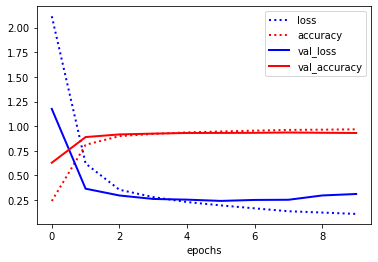

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)        

def build_model_2_1():
    input_shape = (32,32,1)
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (5, 5), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    sgd = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd,
                  

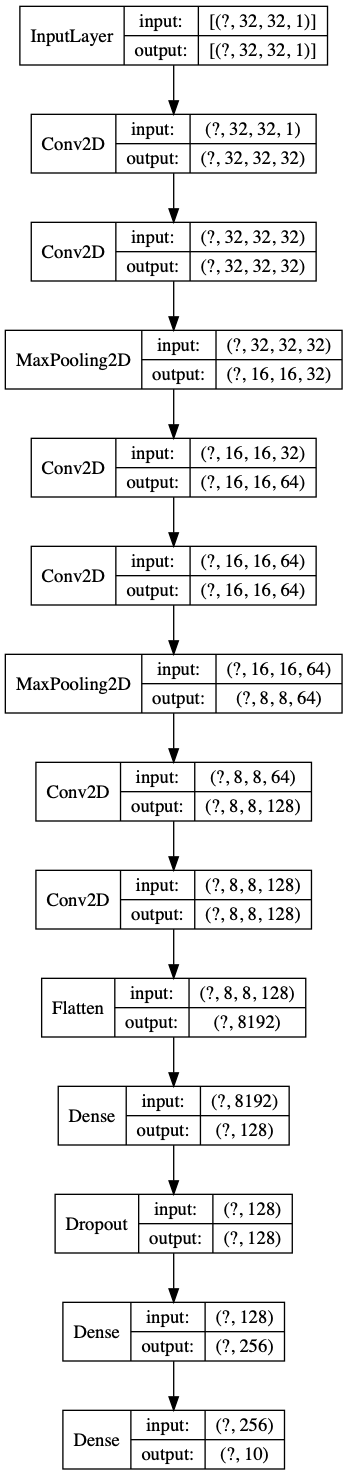

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Because the generator generates new examples from the training data more epochs are needed for the classifier to achieve the same performance. However after some epochs (about 10) the performance increases. Small Width, height shifts and small zooming and shear tranforms work well, while flips work badly, mainly because flips can create non existing numbers.  (length: 362)



Max val score: 95.27%


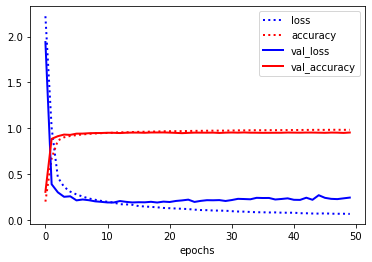


    image_gen = ImageDataGenerator(width_shift_range=0.1, 
                                   height_shift_range=0.1,
                                   zoom_range = 0.1, 
                                   fill_mode= "nearest",
                                   shear_range = 0.1)


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

From the confusion matrix we can see that class 1 & 4; 1 & 7; 3 & 5; are confused rather often by the network. This makes sense as these numbers look rather similar in shape. Investigating missclassifications for each focus number (using an interactive slider), we can also see that there are some labeling issues in the dataset (class 6, 4th picture where a 0 and 6 are mislabeled). There are multiple numbers in some pictures (focus class:5, 2nd pic) thus labels are ambiguous.  (length: 481)

Test score: 0.95%


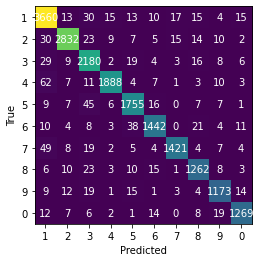

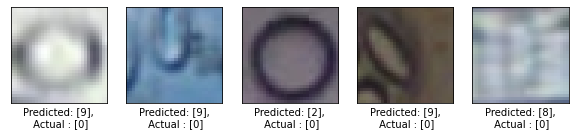

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

It accurately predicts the picture to contain an 8. This number is clearly visible in the 1st layers, with some higher activation for the edges or a part of the number or shifts & rotations. Deeper into the network, the features become more abstract. Some neurons also show no activity. Layer 2 shows some clear activiation for the nr 5 as well, which makes sense, since it is also present in the picture.  (length: 407)



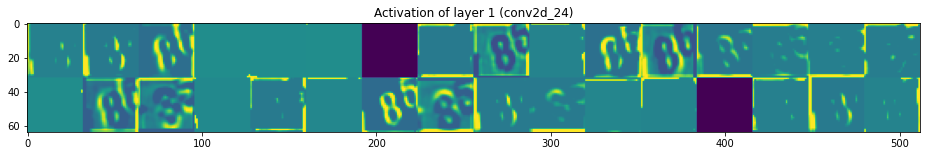

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

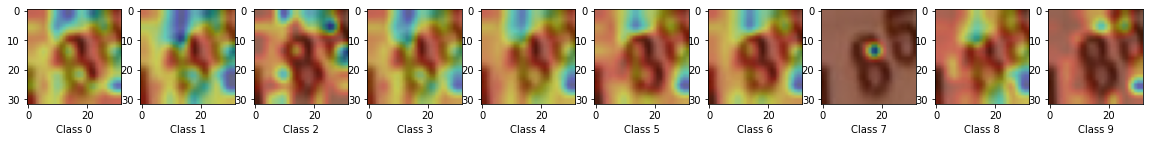

def plot_3_3():
  model = load_model_from_file(base_dir, "model_2_2")
  
  first_image = rgb2gray(X_test)[0]
  first_image = np.expand_dims(first_image, axis=0) 
    
  # image to heatmap shape for open cv 
  first_image_square = X_test[0].reshape((32,32,3))

  fig, axes = plt.subplots(1, 10,  figsize=(20, 10))

  for c in range(10): 
    class_eight_output = model.output[:, c]

    last_conv_layer = model.get_layer(index=6)
    grads = K.gradients(class_eight_output, last_conv_layer.output)[0]

    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([first_image])

    for i in range(128):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    # We resize the heatmap to have the same size as the original image
    

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

Only using the dense layers worked poorly (~80% accuracy). The more convolutional blocks I unfroze, the higher the accuracy. I achieved the best performance (~96 %) when unfreezing all the blocks and just by using the pretrained weights. This network unfreezes the last 3 convolutional blocks. I add 2 dense layers to allow for feature interaction. A small learning rate is used to perform fine tuning on the layers.  (length: 418)



Max val score: 94.08%


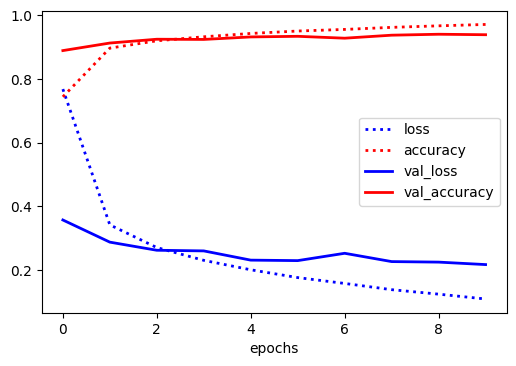

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_72 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_73 (Dense)             (None, 10)                2570      
Total params: 15,111,242
Trainable params: 14,261,002
Non-trainable params: 850,240
___________________________________

def build_model_4_1():
  conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  to_train = ['block5_conv1','block5_conv2','block5_conv3',
              'block4_conv1','block4_conv2','block4_conv3',
              'block3_conv1','block3_conv2','block4_conv3'
              ]
  for layer in conv_base.layers:
      if layer.name in to_train:
        layer.trainable = True
      else: 
        layer.trainable = False

  model = models.Sequential()
  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  sgd = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  
  return model



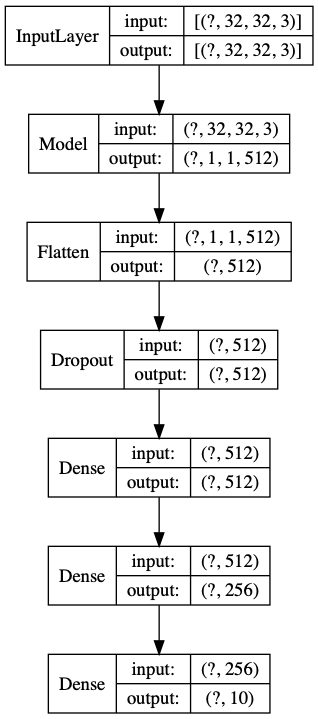

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

I take the output of the flatten layer as an embedding for 3 models: SVC, RF and KNN. The models were chosen since they allow for non linear relationships between features and target. Train and validation set are merged into a train set. The three models show marginally better performance (~ +0.4% for RF, SVC and KNN) than the 2 Dense Layers in the previous model.  (length: 368)

Pipeline: Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', RandomForestClassifier(random_state=1))])
Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', RandomForestClassifier(random_state=1))])
def store_embeddings(model=model):
  """ Stores all necessary embeddings to file
  """
  last_layer = model.get_layer(index=1)
  activation_model = models.Model(inputs=model.input, outputs=last_layer.output)
  X_train_emb = activation_model.predict(X_train_all)
  X_test_emb = activation_model.predict(X_test)
  for name, emb in {"X_train":X_train_emb, "X_test":X_test_emb}.ite

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 11.71 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
